In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electoral-bonds-dataset/electroral_bonds_buyer_data.csv
/kaggle/input/electoral-bonds-dataset/electroral_bonds_receiver_data.csv


Buyer Data

In [2]:
import pandas as pd

In [3]:
buyer = pd.read_csv('/kaggle/input/electoral-bonds-dataset/electroral_bonds_buyer_data.csv')

In [5]:
buyer.head(10)

,Unnamed: 0,Date of Purchase,Purchaser Name,Denomination
0,0,12/Apr/2019,A B C INDIA LIMITED,100000
1,1,12/Apr/2019,A B C INDIA LIMITED,100000
2,2,12/Apr/2019,A B C INDIA LIMITED,1000000
3,3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,4,12/Apr/2019,A B C INDIA LIMITED,100000
5,5,12/Apr/2019,A B C INDIA LIMITED,100000
6,6,12/Apr/2019,A B C INDIA LIMITED,100000
7,7,12/Apr/2019,A B C INDIA LIMITED,1000000
8,8,12/Apr/2019,A B C INDIA LIMITED,100000
9,9,12/Apr/2019,A B C INDIA LIMITED,100000


In [9]:
buyer.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        18871 non-null  int64 
 1   Date of Purchase  18871 non-null  object
 2   Purchaser Name    18871 non-null  object
 3   Denomination      18871 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 589.8+ KB


In [10]:
buyer.describe()

,Unnamed: 0,Denomination
count,18871.000000,1.887100e+04
mean,9435.000000,6.441372e+06
std,5447.732801,4.538947e+06
min,0.000000,1.000000e+03
25%,4717.500000,1.000000e+06
50%,9435.000000,1.000000e+07
75%,14152.500000,1.000000e+07
max,18870.000000,1.000000e+07


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Check for missing values
missing_values = buyer.isnull().sum()

In [14]:
missing_values

Unnamed: 0          0
Date of Purchase    0
Purchaser Name      0
Denomination        0
dtype: int64

In [15]:
# Display the data types of each column
buyer_types = buyer.dtypes

In [16]:
buyer_types

Unnamed: 0           int64
Date of Purchase    object
Purchaser Name      object
Denomination         int64
dtype: object

Data Cleaning

In [17]:
# Remove 'Unnamed: 0' column
data_cleaned = buyer.drop(columns=['Unnamed: 0'])

In [18]:
data_cleaned

,Date of Purchase,Purchaser Name,Denomination
0,12/Apr/2019,A B C INDIA LIMITED,100000
1,12/Apr/2019,A B C INDIA LIMITED,100000
2,12/Apr/2019,A B C INDIA LIMITED,1000000
3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,12/Apr/2019,A B C INDIA LIMITED,100000
...,...,...,...
18866,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18867,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18868,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18869,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000


In [19]:
# Convert 'Date of Purchase' to datetime format
data_cleaned['Date of Purchase'] = pd.to_datetime(data_cleaned['Date of Purchase'], errors='coerce')

In [20]:
data_cleaned

,Date of Purchase,Purchaser Name,Denomination
0,2019-04-12,A B C INDIA LIMITED,100000
1,2019-04-12,A B C INDIA LIMITED,100000
2,2019-04-12,A B C INDIA LIMITED,1000000
3,2019-04-12,A B C INDIA LIMITED,1000000
4,2019-04-12,A B C INDIA LIMITED,100000
...,...,...,...
18866,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000
18867,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000
18868,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000
18869,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000


In [21]:
# Lowercase text in 'Purchaser Name'
data_cleaned['Purchaser Name'] = data_cleaned['Purchaser Name'].str.lower()

In [22]:
data_cleaned

,Date of Purchase,Purchaser Name,Denomination
0,2019-04-12,a b c india limited,100000
1,2019-04-12,a b c india limited,100000
2,2019-04-12,a b c india limited,1000000
3,2019-04-12,a b c india limited,1000000
4,2019-04-12,a b c india limited,100000
...,...,...,...
18866,2024-01-11,westwell gases private limited,10000000
18867,2024-01-11,westwell gases private limited,10000000
18868,2024-01-11,westwell gases private limited,10000000
18869,2024-01-11,westwell gases private limited,10000000


In [23]:
data_cleaned.describe()

,Date of Purchase,Denomination
count,18871,1.887100e+04
mean,2022-03-15 00:28:27.763234304,6.441372e+06
min,2019-04-12 00:00:00,1.000000e+03
25%,2021-04-09 00:00:00,1.000000e+06
50%,2022-07-06 00:00:00,1.000000e+07
75%,2023-07-10 00:00:00,1.000000e+07
max,2024-01-11 00:00:00,1.000000e+07
std,NaN,4.538947e+06


Data Visualization

Denominations of First 10 Purchases

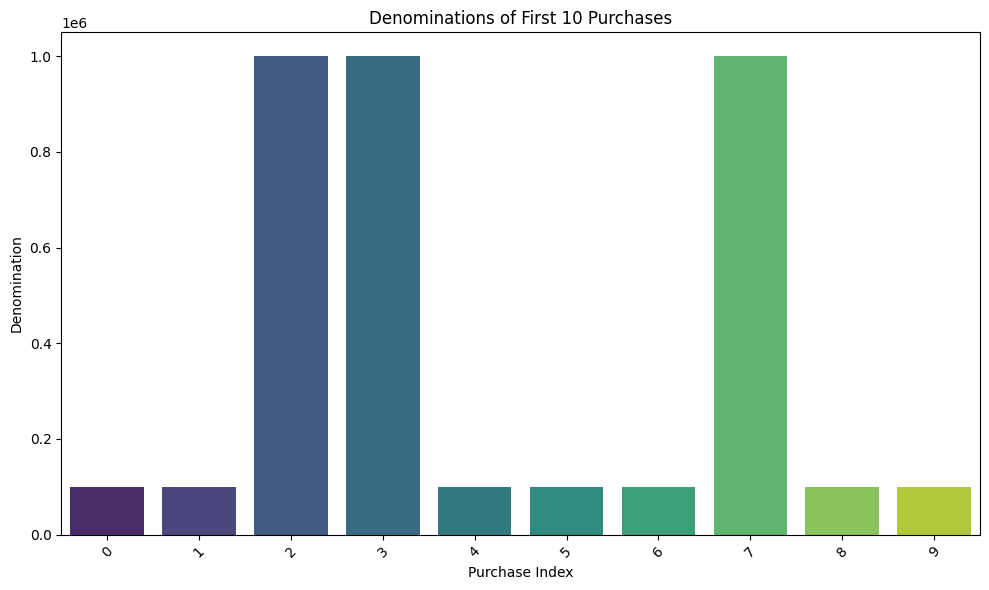

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 10 rows for visualization
data_first_10 = data_cleaned.head(10)

# Bar Graph for the Denominations
plt.figure(figsize=(10, 6))
sns.barplot(x=data_first_10.index, y="Denomination", data=data_first_10, palette="viridis")
plt.title('Denominations of First 10 Purchases')
plt.xlabel('Purchase Index')
plt.ylabel('Denomination')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of Denominations in First 10 Purchases

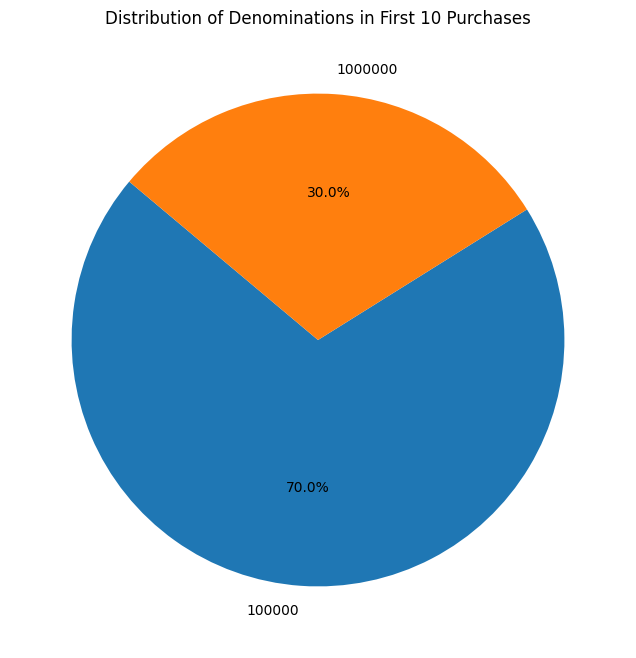

In [26]:
# Pie Chart for the distribution of denominations
denomination_counts = data_first_10['Denomination'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(denomination_counts, labels=denomination_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Denominations in First 10 Purchases')
plt.show()


Receiver Data

In [6]:
receiver = pd.read_csv('/kaggle/input/electoral-bonds-dataset/electroral_bonds_receiver_data.csv')

In [7]:
receiver.head(10)

,Unnamed: 0,Date of\nEncashment,Name of the Political Party,Denomination
0,0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
5,5,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
6,6,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
7,7,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
8,8,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
9,9,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Check for missing values
missing_values = receiver.isnull().sum()

In [29]:
missing_values

Unnamed: 0                     0
Date of\nEncashment            0
Name of the Political Party    0
Denomination                   0
dtype: int64

In [30]:
# Remove 'Unnamed: 0' column
data_cleaned = receiver.drop(columns=['Unnamed: 0'])

In [31]:
data_cleaned

,Date of\nEncashment,Name of the Political Party,Denomination
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
...,...,...,...
20416,24/Jan/2024,JANASENA PARTY,1000000
20417,24/Jan/2024,JANASENA PARTY,1000000
20418,24/Jan/2024,JANASENA PARTY,1000000
20419,24/Jan/2024,JANASENA PARTY,1000000


In [33]:
# Convert 'Date of Encashment' to datetime format
data_cleaned['Date of\nEncashment'] = pd.to_datetime(data_cleaned['Date of\nEncashment'], errors='coerce')

In [34]:
data_cleaned

,Date of\nEncashment,Name of the Political Party,Denomination
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
...,...,...,...
20416,2024-01-24,JANASENA PARTY,1000000
20417,2024-01-24,JANASENA PARTY,1000000
20418,2024-01-24,JANASENA PARTY,1000000
20419,2024-01-24,JANASENA PARTY,1000000


In [40]:
data_cleaned['Name of the Political Party'].value_counts

<bound method IndexOpsMixin.value_counts of 0        all india anna dravida munnetra kazhagam
1        all india anna dravida munnetra kazhagam
2        all india anna dravida munnetra kazhagam
3        all india anna dravida munnetra kazhagam
4        all india anna dravida munnetra kazhagam
                           ...                   
20416                              janasena party
20417                              janasena party
20418                              janasena party
20419                              janasena party
20420                              janasena party
Name: Name of the Political Party, Length: 20421, dtype: object>

In [35]:
# Lowercase text in 'Purchaser Name'
data_cleaned['Name of the Political Party'] = data_cleaned['Name of the Political Party'].str.lower()

In [37]:
data_cleaned

,Date of\nEncashment,Name of the Political Party,Denomination
0,2019-04-12,all india anna dravida munnetra kazhagam,1000000
1,2019-04-12,all india anna dravida munnetra kazhagam,1000000
2,2019-04-12,all india anna dravida munnetra kazhagam,10000000
3,2019-04-12,all india anna dravida munnetra kazhagam,1000000
4,2019-04-12,all india anna dravida munnetra kazhagam,1000000
...,...,...,...
20416,2024-01-24,janasena party,1000000
20417,2024-01-24,janasena party,1000000
20418,2024-01-24,janasena party,1000000
20419,2024-01-24,janasena party,1000000


Data Visualization

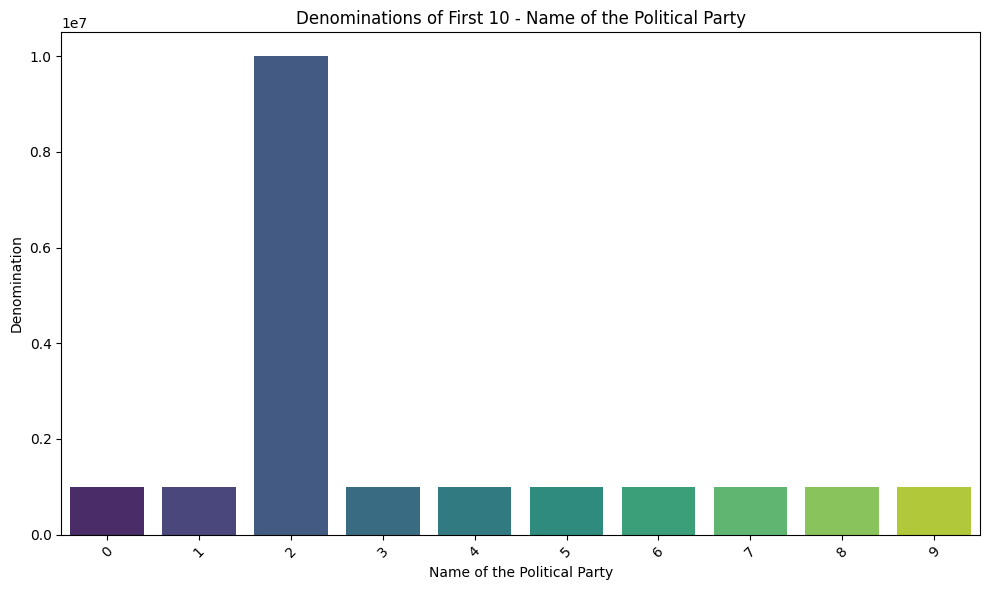

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 10 rows for visualization
data_first_10 = data_cleaned.head(10)

# Bar Graph for the Denominations
plt.figure(figsize=(10, 6))
sns.barplot(x=data_first_10.index, y="Denomination", data=data_first_10, palette="viridis")
plt.title('Denominations of First 10 - Name of the Political Party')
plt.xlabel('Name of the Political Party')
plt.ylabel('Denomination')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

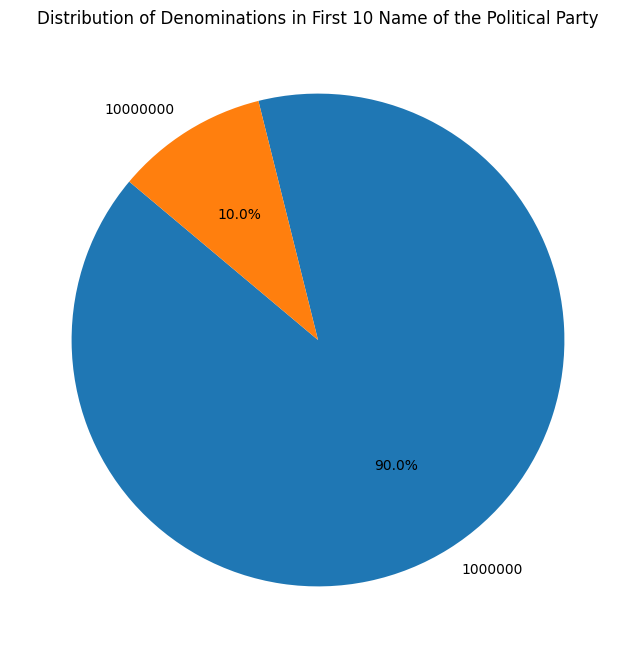

In [41]:
# Pie Chart for the distribution of denominations
denomination_counts = data_first_10['Denomination'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(denomination_counts, labels=denomination_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Denominations in First 10 Name of the Political Party')
plt.show()